<a href="https://colab.research.google.com/github/Shubham-Niture/S-ML-Assignments/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Evaluation Metrics:
           Decision Tree  Random Forest  Gradient Boosting
Accuracy        0.894928       0.927536           0.931159
Precision       0.896175       0.926344           0.931290
Recall          0.894928       0.927536           0.931159
F1-Score        0.895444       0.926664           0.930904


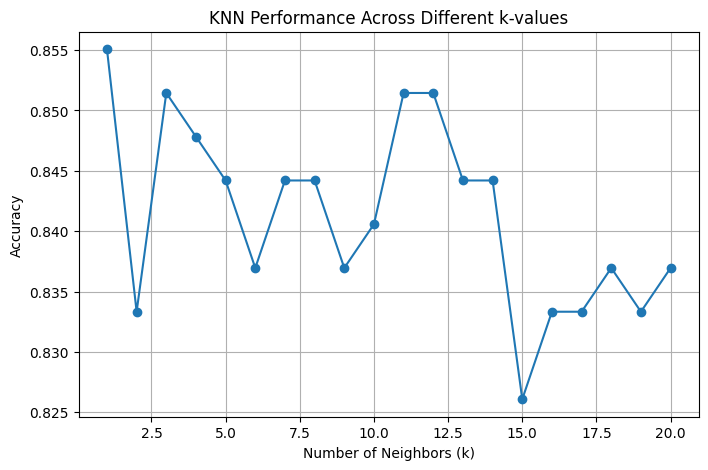

The optimal value of k for KNN is: 1 with an accuracy of 0.86


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load the dataset
file_path = '/content/Phone_Sales_2024.csv'  # Path to the dataset file
data = pd.read_csv(file_path)

# 2. Drop rows with missing values for simplicity
# Dropping NaN ensures clean data for model training
data = data.dropna()

# 3. Encode the target variable 'price_range' into numerical format
# This makes it suitable for machine learning models
le = LabelEncoder()
data['price_range_encoded'] = le.fit_transform(data['price_range'])

# 4. Select relevant numeric features for the models
numeric_columns = ['price_usd', 'storage', 'ram', 'weight', 'battery', 'ppi_density']
X = data[numeric_columns]  # Features
y = data['price_range_encoded']  # Target

# 5. Standardize the feature values to have mean=0 and std=1
# Standardization improves the performance of distance-based models like KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split the dataset into training and testing sets
# 80% data for training, 20% data for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. Initialize and train three tree-based models
# Decision Tree, Random Forest, and Gradient Boosting Classifiers
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Train each model using the training data
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# 8. Make predictions using each model on the test data
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)
gb_preds = gb.predict(X_test)

# 9. Evaluate each model using accuracy, precision, recall, and F1-score
# Store the results in a dictionary
metrics = {
    "Decision Tree": [accuracy_score(y_test, dt_preds),
                      precision_score(y_test, dt_preds, average='weighted'),
                      recall_score(y_test, dt_preds, average='weighted'),
                      f1_score(y_test, dt_preds, average='weighted')],
    "Random Forest": [accuracy_score(y_test, rf_preds),
                      precision_score(y_test, rf_preds, average='weighted'),
                      recall_score(y_test, rf_preds, average='weighted'),
                      f1_score(y_test, rf_preds, average='weighted')],
    "Gradient Boosting": [accuracy_score(y_test, gb_preds),
                          precision_score(y_test, gb_preds, average='weighted'),
                          recall_score(y_test, gb_preds, average='weighted'),
                          f1_score(y_test, gb_preds, average='weighted')]
}

# Convert the results to a DataFrame for better display
metrics_df = pd.DataFrame(metrics, index=["Accuracy", "Precision", "Recall", "F1-Score"])
print("Model Evaluation Metrics:")
print(metrics_df)

# 10. Optimize the KNN model by testing different k-values
k_values = range(1, 21)  # Testing k from 1 to 20
knn_scores = []  # Store accuracy scores for each k

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN with k neighbors
    knn.fit(X_train, y_train)  # Train the model
    preds = knn.predict(X_test)  # Make predictions on test data
    knn_scores.append(accuracy_score(y_test, preds))  # Record accuracy

# 11. Plot the accuracy of KNN for different k-values
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_scores, marker='o')  # Line plot with markers
plt.title("KNN Performance Across Different k-values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# 12. Find the best k-value based on accuracy
optimal_k = k_values[knn_scores.index(max(knn_scores))]
print(f"The optimal value of k for KNN is: {optimal_k} with an accuracy of {max(knn_scores):.2f}")
